# INFO 3350/6350

## Problem set 2: Counting words

## Description

The goal of this problem set is to explore the first steps of text analysis by creating the world's least visually-sophisticated word count graphic. We're aiming, ultimately, for a simple plot that shows the comparative frequency of the top words in a text. 

The graphic should be informative of the text from which it is created. Along the way, you'll experiment with word counts, stopword removal, case folding, and other text pre-processing techniques.

This problem set also aims to make you reflect on the conceptual difference between **words** (which we care about) and **tokens** (which are a means to an end).

We'll work with *Moby-Dick*, by the American author Herman Melville, and *Pride and Prejudice*, by the British writer Jane Austen.

## Counting words in *Moby-Dick*

### 1. Use NLTK's `word_tokenize` function to tokenize the text of *Moby-Dick*, then produce a `Counter` that stores  the counts of each word type in the novel. (3 points)

You can find the full-text file of the novel [here](https://github.com/wilkens-teaching/info3350-s22/blob/main/data/texts/A-Melville-Moby_Dick-1851-M.txt), on the class GitHub site in the `data/texts` directory.

Hints:
* Python's `open` funtion ([documentation](https://docs.python.org/3/library/functions.html#open));
* Python's `Counter` object ([documentation](https://docs.python.org/3/library/collections.html#collections.Counter));
* NLTK's `word_tokenize` ([documentation](https://www.nltk.org/api/nltk.tokenize.html)).
* You can refer to the [notebook from lecture 3](https://github.com/wilkens-teaching/info3350-s22/blob/main/lectures/lec-03-tokens.ipynb) to adapt code to do all of this. But you must get that code working in the cell below.

**Print the length of your data structure.** This will tell you how many unique types the text contains. Be sure to include an informative label with your output, not just a number.

#import os
#moby = os.path.join('Desktop', 'Text_Mining', 'ps_02', 'A-Melville-Moby_Dick-1851-M.txt')
file = "A-Melville-Moby_Dick-1851-M.txt"

from collections import Counter

moby_fast = Counter()

with open(file, 'r') as f:
    for line in f: # read one line at a time for memory efficiency
        mtokens = line.strip().split() # strip newlines, split on space
        for token in mtokens:
            moby_fast[token] += 1
            
print(f"Word Type Count: {len(moby_fast)}")

So called naive way. Do not grade, simply wanted to implement to compare results. 

In [377]:
from nltk import word_tokenize
from collections import Counter
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

moby_nltk = Counter()
file = "A-Melville-Moby_Dick-1851-M.txt"

with open (file, 'r') as f:
    for line in f:
        mtokens = word_tokenize(line)
        for token in mtokens:
            moby_nltk[token] += 1

print(f"Word Tokenizer Count: {len(moby_nltk)}")

Word Tokenizer Count: 20638


### 2. Write a function to sum your counts and print the *n* most frequent words. (3 points)

Write a function that:

* Takes a `Counter` object, `data`, containing word count information (of the type you produced in the previous cell) and the number of top terms, `n`, to print
* Prints the total number of words in the text by summing the individual word counts in `data` and prints the `n` words with the highest number of occurrences
    * Be sure to format your printed output as shown in the example below
* Returns `None`


The head of your function should look like this:
 
```
def word_stats(data, n=20):
```

The output of your fuction should look like this:

```
Total words in the text: 255380

Top 20 words by frequency:
,      19204
the    13715
.      7432
[and so on ...]
```

 - **Hint**: Consult the methods available for `Counter` objects in the documentation.

In [21]:
def sum_total(data):
    word_list = data.most_common()
    sum = 0
    for tup in word_list:
        sum += tup[1]
    return(sum)

In [22]:
def word_stats(data, n):
    total = sum_total(data)
    print(f"Total words in the text: {total}. \n")
    print(f"Top {n} most common tokens are: {data.most_common(n)}")

### 3. Call your `word_stats` function on your *Moby-Dick* counts data. (2 points)

In [23]:
word_stats(moby_nltk, 20)

Total words in the text: 255218. 

Top 20 most common tokens are: [(',', 19204), ('the', 14422), ('.', 7280), ('of', 6586), ('and', 6414), ('a', 4699), ('to', 4597), (';', 4173), ('in', 4164), ('that', 3084), ('his', 2530), ('it', 2517), ('i', 2109), ('he', 1895), ('but', 1813), ("'s", 1787), ('!', 1767), ('is', 1748), ('as', 1741), ('with', 1722)]


As you can see, the top words that we counted aren't super informative, but ...

### 4. List two things you *can* tell about *Moby-Dick* from the naïve word counts. (2 points)

  First thing: I noticed that one of the most common words is "he" and "him". This leads me to believe that this is a male dominated narrative.
  
  Second thing: "all" is a very interesting word to rank at the top. I can't think of much everyday uses of all aside from "all of us" or "them all". Perhaps implying that this is a narrtive with a large group of people. 

### Case folding and stopwords

Some definitions:

* **Case folding**: converting all tokens to lowercase, thus ignoring the capitalization of tokens ("Cat" = "cat" = "cAt", etc.)
* **Stopwords**: words that we exclude from our counts because they are not useful or informative for our task

### 5. Give two reasons why it would be useful to apply case folding and to ignore/remove stopwords. (2 points)

Remember, our goal is to produce a list that contains *only* interesting words and ranks them by frequency.
 

Language is very dynamic. It evolves and changes over the years. What is common place gramar or synthax today might not have been 10, 50 or 200 years ago. We are acustomed to capatlizing letters in a pretty abritrary order. If the words are of interest and not their case, then everything should be uniform in order to have an accurate analysis.

Stopwords would always rank amoung the top n number of words for every and all literary text. If we wanted to conduct an analysis of hamlet or voltair, they would would all use the stop words that are common in written speach. If you wanted to have a unique meaningful list for eah text you need to remove common meaningless stopwords. 

### 6. Produce better wordcounts for *Moby-Dick*. (6 points)

Modify the original code you used to count words in *Moby-Dick* so that you:

- ignore token case;
- remove English-language stopwords;
- print your stopword list;
- print the total token counts;
- print the top-20 tokens with their counts.

We can remove stopwords either by not counting them in the first place, or by excluding them from our reporting after we've collected them. Both methods have advantages and drawbacks. The one you pursue is up to you.

**Hints**:

- Python's `.lower()` ([documentation](https://docs.python.org/3/library/string.html));
- NLTK's `stopwords` function ([documentation](https://www.nltk.org/book/ch02.html).

In [136]:
# Work with sample stopwords

moby_nltk_lower = Counter()
file = "A-Melville-Moby_Dick-1851-M.txt"

with open (file, 'r') as f:
    for line in f:
        mtokens_lower = word_tokenize(line.lower())
        for token in mtokens_lower:
            moby_nltk_lower[token] += 1
print(f"Total Token Count: {len(moby_nltk_lower)} \n")

#modifying original code to make the entire text lower case.

stops = stopwords.words('english') # NLTK's short list of English stopwords

for punct in string.punctuation:
    stops.append(punct) # Add punctuation marks to stoplist
print("MY stoplist", stops)

for stop in stops:
    del moby_nltk_lower[stop]
moby_nltk_lower.most_common(10)

Total Token Count: 18605 

MY stoplist ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not',

[("'s", 1787),
 ('--', 1714),
 ("''", 1565),
 ('``', 1529),
 ('whale', 1096),
 ('one', 913),
 ('like', 580),
 ('upon', 565),
 ('ahab', 511),
 ('man', 498)]

In [137]:
word_stats(moby_nltk_lower, 20)

Total words in the text: 115538. 

Top 20 most common tokens are: [("'s", 1787), ('--', 1714), ("''", 1565), ('``', 1529), ('whale', 1096), ('one', 913), ('like', 580), ('upon', 565), ('ahab', 511), ('man', 498), ('ship', 469), ('old', 443), ('ye', 439), ('would', 436), ('sea', 384), ('though', 383), ('yet', 344), ('time', 326), ('captain', 325), ('long', 318)]


Is this better? Maybe!

### 7. Note one or more advantage of this stopword-removed count, as well as one or more disadvantage. (2 points)

**Advantage(s):**
One advantage is that you can actually get a gauge of the general substance of the text. You can see here that the text mentions a whale as the most common word (possible it is a book about a whale???), you also see that a name appears "ahab" (maybe the main character???) 


**Disadvantage(s):**
Some times the use of stop words could add to a work. Coming from a philosophical background I know how meticulous philosophers are with their word usage. For example in a text about epistemolgy; one can distigusih between *the* essence of an object versus an essence. Here these two points have drastically different meanings however they would be counted as only one word "essence" if you delete tokens. 

### 8. List at least two ideas for modifying the stopword list to better approach our goal. (2 points)

**Remember**: Our goal is to produce a list that contains *only* interesting words and ranks them by frequency.

1: Add older less known punctuation to our puntuation list. For example in this case the first three most used tokens are all non-word tokens. I would delete these from our counter and then be curious to see what else appears 


2: Something I am curious to see is how bining these words into similar groups would affect the top words list. What I mean by bining is counting words which are synonyms together and furthermore words which convey the same meaning but are different. Such as "sea" and "ocean".

### 9. Implement one or more of your ideas to improve the stopword list. (5 points)

Rerun your counts using the improved stopword list, then display the output of your new version.

In [138]:
extra_stops = stopwords.words('english') 
added_punct = ["'s", '--', "''", '``']

for punct in string.punctuation:
    extra_stops.append(punct) 
for punct in added_punct:
    extra_stops.append(punct)  # Hello Grader!! I added the extra punction marks that were not already in the punction list to the word_stops list. 

print("MY stoplist", stops, "\n")

for stop in extra_stops:
    del moby_nltk_lower[stop]

moby_nltk_lower.most_common(10)

word_stats(moby_nltk_lower, 20)

MY stoplist ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

Refine your stoplist until you're satisfied with it. Make sure your code above displays the final output of your `word_stats` function. Then move on.

## Comparing *Moby-Dick* and *Pride and Prejudice*

Comparing Melville's *Moby-Dick* and Austen's *Pride and Prejudice* is a particularly compelling task. As some of you might know, althought both authors wrote in English, published in the nineteenth century, and are among their nations' most famous novelists, they produced widely different books. One tells of dangerous adventures and hostile environments, the other of family dynamics and domestic life. The mental space of the first is that of an existential but concretelly pursued quest, the other of tumultous but secret passions. The first is written by an American writer of a merchant, whereas the second is written by the daughter of a British pastor. Can we capture some of these differences with a method as simple as word frequencies?

### 10. Tokenize and count words in _Pride and Prejudice_. (5 points)

Follow the final version of the code you developed for *Moby-Dick*. You can find the full-text file of Austen's novel [in the course GitHub repo](https://github.com/wilkens-teaching/info3350-s22/blob/main/data/texts/B-Austen-Pride_Prejudice-1813-F.txt).

In [159]:
pride_file = "Austen-Pride_Prejudice.txt"
pride_nltk = Counter()
with open (pride_file, 'r', encoding="utf8") as f:
    for line in f:
        ptokens = word_tokenize(line.lower())
        for token in ptokens:
            pride_nltk[token] += 1
pride_nltk.most_common(10)

print(f"Total Token Count: {len(pride_nltk)} \n")

#modifying original code to make the entire text lower case.

stops = stopwords.words('english') # NLTK's short list of English stopwords

extra_stops = stopwords.words('english') 
added_punct = ["'s", '--', "''", '``', '“', '”']

for punct in string.punctuation:
    extra_stops.append(punct) 
for punct in added_punct:
    extra_stops.append(punct)  # Hello Grader!! I added the extra punction marks that were not already in the punction list to the word_stops list. 

print("MY stoplist", stops, "\n")

for stop in extra_stops:
    del pride_nltk[stop]

pride_nltk.most_common(10)

word_stats(pride_nltk, 20)

Total Token Count: 6631 

MY stoplist ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 

### 11. List two things you *can* tell about *Pride and Prejudice* from these word counts. (2 points)

1) Again we are able to tell some of the main charaters of the novel from this basic analysis. We know that the story is told in first person from the pronoun "I"

2) Furthermore we know that the novel most likely revolves around a female protaganist by the "miss" and the name "elizabeth". 

### 12. Give at least one idea for improving the stopword list specifically for *Pride and Prejudice*. (1 point)

**Remember**: Our goal is to produce a list that contains *only* interesting words and ranks them by frequency.

My idea would be to not count the addresses used the in the book, like "mr." "sir" "madam" "mrs". Additonally I would like to lemmatize the words in order to improve the frequency count. 

### 13. Implement your idea for improving the stopword list. (3 points)

Rerun your wordcount with the improved stopword list, then display the output.

I have already improved my tokenization list by using python lower method and also deleting certain non-standard punctuation that appeared on my top 10 list. To imporove it more I will have to use the lemmatizer package shown in class. A sample usage of the lemmatizer package is shown below, however a fully implemanted lemmatizer fucntion seems outside the scope of a 3-point question?

In [379]:
pride_words = ['mr.', 'elizabeth', 'could', 'would', 'darcy', 'said', 'mrs.', 'much', 'bennet', 'bingley', 'must', 'jane', 'miss', 'one', 'know', 'though', 'never', 'soon', 'sister', 'well']
lemmatizer = WordNetLemmatizer()
for word in pride_words:
    print(f"{word}, {lemmatizer.lemmatize(word)}")


mr., mr.
elizabeth, elizabeth
could, could
would, would
darcy, darcy
said, said
mrs., mrs.
much, much
bennet, bennet
bingley, bingley
must, must
jane, jane
miss, miss
one, one
know, know
though, though
never, never
soon, soon
sister, sister
well, well


### 14. Calculate and print the normalized word counts for each novel. (10 points)

Now that we have the word counts of the top-20 tokens for both *Moby-Dick* and *Pride and Prejudice*, it would be interesting to compare the frequency of, for example, the word `'whale'` with that of the word `'mr.'`. However, that's not immediately possible with our word counts as they are, because *Moby-Dick* is twice as long as *Pride and Prejudice*.

In the previous steps, we took into consideration *raw word counts*, the number of occurrences of each word in the text. Here, we will calculate *normalized word counts*, the words' frequencies relative to the length of the text.

For each word, we will:
- count its occurrences;
- divide the number of occurrences by the total number of words in the text, **including** stopwords but **excluding** punctuation;
  - What tokens should be included in the total number of words? If you were to manually count words on a novel's page, would you consider stopwords? What about punctuation?
  - How will you identify punctuation alone?
- the result will be a decimal less than one; multiply it by 100,000;
  - This makes the task of comparing relative word counts a little easier. It is more difficult to see differences when numbers are presented as small decimals.
  - Also, the number we obtain will be the number of times that word occurs in 100k words, which is roughly the length of an average novel.
- round our result to the nearest integer
           
For example: `whale` in *Moby-Dick*, as  has a relative frequency of about 500, depending on exactly how we implement the count. That is, if we selected 100,000 words at random from *Moby-Dick*, we would expect to encounter `whale` about 500 times.

**Write a function, `calculate_normalized_counts`, that implements the above procedure.** The head of your function should be:
 
```
def calculate_normalized_counts(file_path, stops):
```
Where `file_path` is the path to the file you want to analyze and `stops` is a list of stopwords to be applied.

Your function should return the integer number of words in the text (including stopwords but excluding punctuation) and a `Counter` object containing the normalized word counts as specified above.

In [205]:
def calculate_normalized_counts(file_path, stops):    
    file_nltk = Counter()
    with open (file_path, 'r', encoding="utf8") as f:
        for line in f:
            tokens = word_tokenize(line.lower())
            for token in tokens:
                file_nltk[token] += 1

    for punct in string.punctuation:
        del file_nltk[punct]

    word_count = len(file_nltk.most_common())
    print(f"Total words in the text: {sum_total(file_nltk)}." + "\n")
    
    normalized = file_nltk
    total = sum(normalized.values(), 0.0)
    for key in normalized:
        normalized[key] /= total
        normalized[key] *= 100000
    for stop in extra_stops:
        del normalized[stop]
    print(f"Top 20 words by relative frequency: {normalized.most_common(20)}.")

**Call your function on *Moby-Dick* and on *Pride and Prejudice*, using the stopword lists you developed earlier**

In [206]:
calculate_normalized_counts(pride_file, extra_stops)

Total words in the text: 126571.

Top 20 words by relative frequency: [('mr.', 606.774063569064), ('elizabeth', 501.6947009978589), ('could', 414.78695751791486), ('would', 369.7529449873984), ('darcy', 328.669284433243), ('said', 316.8182285041597), ('mrs.', 266.2537232067377), ('much', 256.7728784634711), ('bennet', 255.19273767292665), ('bingley', 240.97147055802674), ('must', 240.18140016275447), ('jane', 229.91048502421563), ('miss', 223.58992186203793), ('one', 210.94879553768243), ('know', 186.45661328424362), ('though', 178.55590933152143), ('never', 172.2353461693437), ('soon', 170.65520537879925), ('sister', 170.65520537879925), ('well', 169.0750645882548)].


**Print the 20 words with the highest normalized/relative frequency for each novel.**

The output of your function should look like this. Don't worry if your numbers don't match exactly.
     
```
Total words in the text: 215793

Top 20 words by relative frequency:
whale 	 508
one 	 423
like 	 269
```

In [207]:
calculate_normalized_counts(file, extra_stops)

Total words in the text: 220826.

Top 20 words by relative frequency: [('whale', 496.31836830807964), ('one', 413.4476918478802), ('like', 262.65023140391077), ('upon', 255.85755300553376), ('ahab', 231.4039107713766), ('man', 225.51692282611648), ('ship', 212.38441125592095), ('old', 200.61043536540083), ('ye', 198.79905445916694), ('would', 197.44051877949153), ('sea', 173.89256699845126), ('though', 173.4397217718928), ('yet', 155.7787579361126), ('time', 147.6275438580602), ('captain', 147.1746986315017), ('long', 144.00478204559246), ('still', 141.28771068624167), ('said', 138.1177941003324), ('great', 137.21210364721546), ('boat', 131.77796092851383)].


### 15. Reflect on the normalization task. (2 points)
* Why has the ranking of the most frequent tokens not changed after normalization for both *Moby-Dick* and *Pride and Prejudice*?
 

The ranking for these worda after adjusting our counter for puncutaution and tokens was alrady in a sense normalzied. When we reomved stop words and only measure the words in the novel that hold substance it becomes clear that even after normalizing these top 20 words will be the same. The process of removing stop words is the import issue. 

* Aside from multiplying by 100k, suggest another way of normalizing raw word counts.
 

Raw word count can be further imporved by also dividing by a normlalization constant. In our original procedure we multiplied the value by 100k because the average novel length is 100k then we divded by the number of raw tokens in the file, what if instead of diving by a different constant every time we defined some normalization constant C which is the averga number of tokens and types in novels. C can change from genre and period or can be remained constant to have a better understanding on how this particular piece of literature ranks amoung all other works.

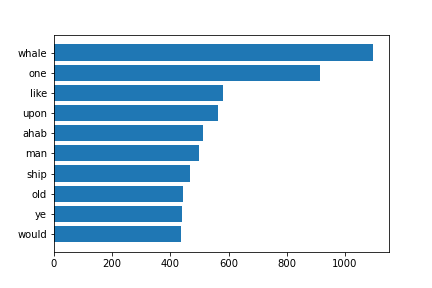
### 16. Visualization (5 points)

Now, make the world's least visually-impressive word count graphic. Your task is to produce a visual representation of your top 10 words that shows the frequency (absolute, not normalized) of those terms. The simplest acceptable version of this visualization is a bar chart.

**Complete the starter code below to produce a bar chart of the top ten words in each of the two texts we've studied.**

Your output might look like this:

![bar chart](./ps_02_bar_chart.png)

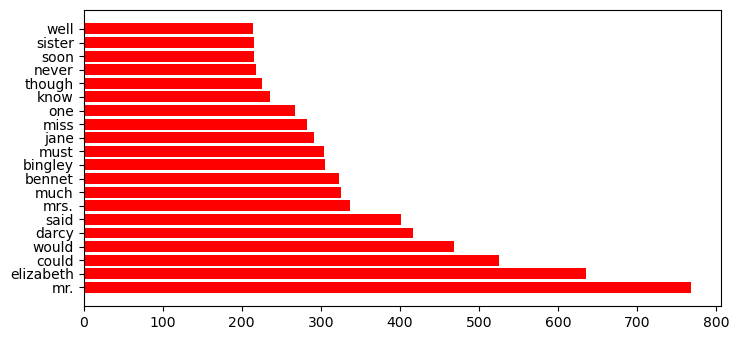

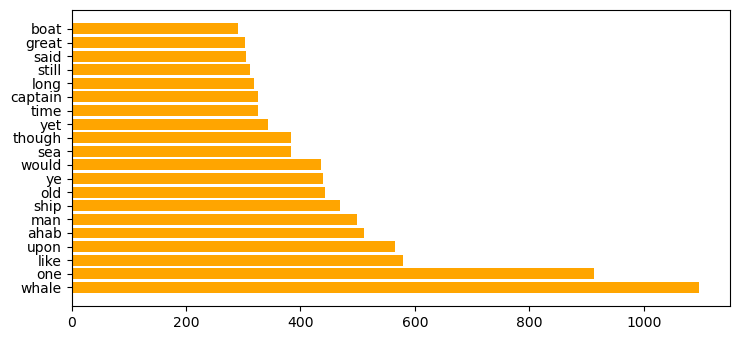

In [375]:
# Make a bar chart of the top 10 words
import matplotlib.pyplot as plt

# Get labels and counts
xlabels = "Count"
ylabel = "Word"
title = "Top 20 words in Moby Dick"
counts = 20
# Create the figure
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

pride_top20 = [('mr.', 768), ('elizabeth', 635), ('could', 525), ('would', 468), ('darcy', 416), ('said', 401), ('mrs.', 337), ('much', 325), ('bennet', 323), ('bingley', 305), ('must', 304), ('jane', 291), ('miss', 283), ('one', 267), ('know', 236), ('though', 226), ('never', 218), ('soon', 216), ('sister', 216), ('well', 214)]
moby_20 = [('whale', 1096), ('one', 913), ('like', 580), ('upon', 565), ('ahab', 511), ('man', 498), ('ship', 469), ('old', 443), ('ye', 439), ('would', 436), ('sea', 384), ('though', 383), ('yet', 344), ('time', 326), ('captain', 325), ('long', 318), ('still', 312), ('said', 305), ('great', 303), ('boat', 291)]

def name_list(counter):   
    out_put_list_name = []
    out_put_list_count = []
    for tup in counter:
        out_put_list_name.append(tup[0])
    for tup in counter:
        out_put_list_count.append(tup[1])
    return(out_put_list_name)

def counter_list(counter):   
    out_put_list_count = []
    for tup in counter:
        out_put_list_count.append(tup[1])
    return(out_put_list_count)


plt.barh(name_list(pride_top20), counter_list(pride_top20), color = "red" )
plt.show()
plt.barh(name_list(moby_20), counter_list(moby_20), color = "orange")
plt.show()

### 17. OPTIONAL: Word clouds. (5 bonus points)

Make a word cloud for one of the two novels. You can do this the ugly way in pure `matplotlib` or the easy-and-pretty way by using the [`wordcloud`](https://github.com/amueller/word_cloud) library. 

Unfortunately, `wordcloud` is not among the packages you installed in your virtual environment. You can install it by first activating the environment, then running  one of the following commands:
 - `conda install -c conda-forge wordcloud`
 - if `conda` doesn't work (probably because you have an M1 Mac), try `pip install wordcloud`

If you use `wordcloud`, you'll be interested in the [`.generate_from_frequencies()` method](http://amueller.github.io/word_cloud/auto_examples/frequency.html).

Here are examples of the ugly and the pretty outputs. Your specific results might vary.

![ugly](./ps_02_ugly_cloud.png)
![pretty](./ps_02_pretty_cloud.png)

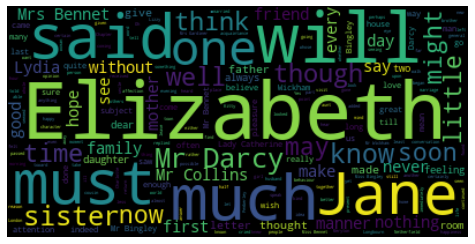

In [278]:
from wordcloud import WordCloud

# Read the whole text.
text = open('Austen-Pride_Prejudice.txt', encoding="utf8").read()

# Generate a word cloud image
wordcloud = WordCloud().generate(text)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()